In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fig=plt.figure(figsize=(18,6))

<Figure size 1296x432 with 0 Axes>

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/vchrombie/da-python/master/day-4/train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


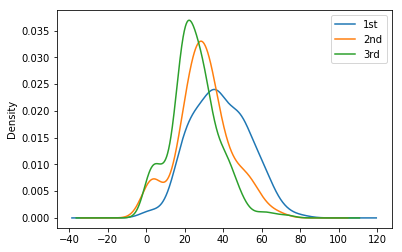

In [7]:
for x in [1,2,3]:
        df.Age[df.Pclass == x].plot(kind = "kde")
plt.legend(("1st","2nd","3rd"))
plt.show()


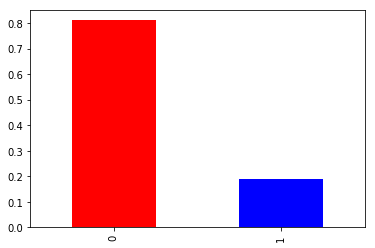

In [9]:
color=['red','blue']
df.Survived[df.Sex == "male"].value_counts(normalize = True).plot(kind = "bar",color=color)

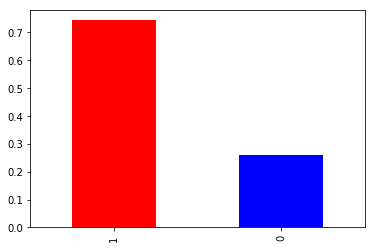

In [11]:
df.Survived[df.Sex == "female"].value_counts(normalize = True).plot(kind = "bar",color=color)

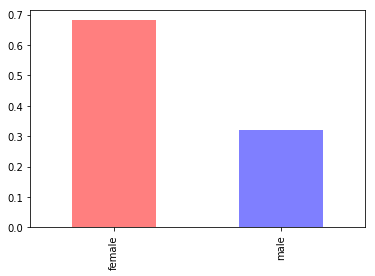

In [15]:
Female_colour = "red"
df.Sex[df.Survived == 1].value_counts(normalize = True).plot(kind = "bar",alpha=0.5, color = [Female_colour , 'b'])

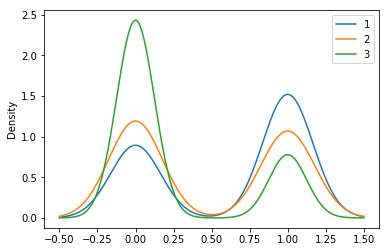

In [16]:
for x in [1,2,3]:
    df.Survived[df.Pclass == x].plot(kind = "kde")
plt.legend(("1","2","3"))

Text(0.5, 1.0, 'Rich Men Survival Rate')

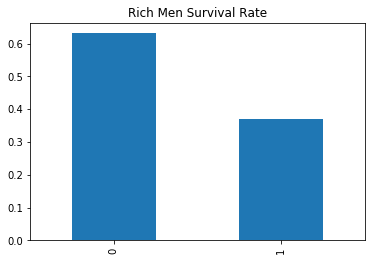

In [17]:
df.Survived[(df.Sex == "male") & (df.Pclass == 1)].value_counts(normalize = True).plot(kind = "bar")
plt.title("Rich Men Survival Rate")

Text(0.5, 1.0, 'Poor Men Survival Rate')

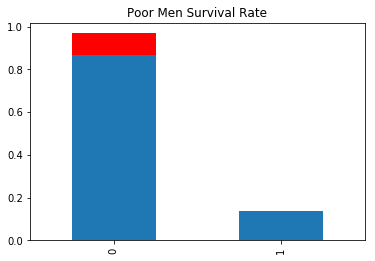

In [20]:
woemn = "#FF0000"
df.Survived[(df.Sex == "female") & (df.Pclass == 1)].value_counts(normalize = True).plot(kind = "bar", color = woemn)
plt.title("Rich Women Survival Rate")

df.Survived[(df.Sex == "male") & (df.Pclass == 3)].value_counts(normalize = True).plot(kind = "bar")
plt.title("Poor Men Survival Rate")

In [21]:
df["hypo"] = 0
df.loc[df.Sex == "female" ,"hypo"] = 1
df["result"] = 0
df.loc[df.Survived == df.hypo, "result"] = 1
df["result"].value_counts(normalize = True)

1    0.786756
0    0.213244
Name: result, dtype: float64

In [22]:
df["Fare"] = df["Fare"].fillna(df["Fare"].dropna().median())
df["Age"] = df["Age"].fillna(df["Age"].dropna().median())
df.loc[df["Sex"] == "male" ,"Sex"] = 0
df.loc[df["Sex"] == "female" ,"Sex"] = 1
df["Embarked"] = df["Embarked"].fillna("S")
df.loc[df["Embarked"] == "S" , "Embarked"] = 0
df.loc[df["Embarked"] == "C" , "Embarked"] = 1
df.loc[df["Embarked"] == "Q" , "Embarked"] = 2

In [25]:
from sklearn import linear_model
test = pd.read_csv("https://raw.githubusercontent.com/vchrombie/da-python/master/day-4/train.csv")
target = df["Survived"].values
feature_names = ["Pclass", "Age" , "Sex" , "SibSp" , "Parch"]
features  = df[feature_names].values
classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(features, target)
classifier_.score(features, target)

C:\Users\PEER MOHAMED\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7934904601571269

In [26]:
from sklearn import preprocessing

poly = preprocessing.PolynomialFeatures(degree = 2)
poly_features = poly.fit_transform(features)

classifier_ = classifier.fit(poly_features, target)
classifier_.score(poly_features,target)

C:\Users\PEER MOHAMED\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8305274971941639

In [31]:
from sklearn import preprocessing

poly = preprocessing.PolynomialFeatures(degree = 3)
poly_features = poly.fit_transform(features)

classifier_ = classifier.fit(poly_features, target)
classifier_.score(poly_features,target)

C:\Users\PEER MOHAMED\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8294051627384961